In [16]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage import data, color, img_as_float, img_as_ubyte, filters, feature, io

%matplotlib inline
from IPython.display import HTML, display

# Image filters and feature detection

In this lab, we will implement some simple solution to perform features detection on images. First of all, what does it mean **feature detection**?

*In computer vision and image processing the concept of feature detection refers to methods that aim at computing abstractions of image information and making local decisions at every image point whether there is an image feature of a given type at that point or not. The resulting features will be subsets of the image domain, often in the form of isolated points, continuous curves or connected regions.*

[cit. <a href="https://en.wikipedia.org/wiki/Feature_detection_(computer_vision)">Wikipedia</a>]

In this lab we will restrict our attention on **edges** and **corners** (see example below). For a comprehensive summary on feature detection algorithms, I strongly recommend to check <a href="http://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=feature#module-skimage.feature">`skimage.feature`</a> API.

In [6]:
display(HTML("<table><tr><td><img src='I1.png'></td><td><img src='E1.png'></td><td><img src='C1.png'></td></tr></table>"))

,,


## 1. Edge detection

Over the years, <a href="https://en.wikipedia.org/wiki/Edge_detection">several algorithms</a> for edge detection were developed. In this lab we are going to implement an edge detector that follows this simple strategy:

1. perform Gaussian smoothing on an input greyscale image;
2. then compute the partial first derivatives on the result and the magnitude of the gradient;
4. thresholds the magnitude of the gradient with an input threshold;
5. return the edge map.

The parameters of every intermediate step, must be specified as input arguments.

### 1.1 Gaussian smoothing
We already covered this step in the last lab.

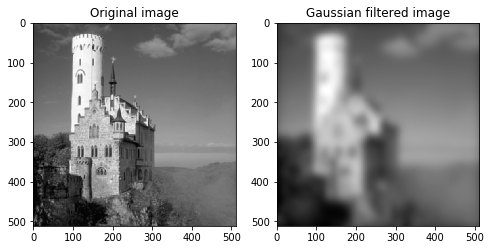

In [7]:
# Load an input image and convert it to grayscale  
RGBimg = io.imread('castle.png')
img = img_as_float(color.rgb2gray(RGBimg))

# Apply gaussian filter
sigma = np.sqrt(100) # TRY WITH OTHER VALUES! //The higher the value, the blurer the image
img_smooth = filters.gaussian(img, sigma)

plt.figure(figsize=(8,6))
plt.subplot(121)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(122)
plt.imshow(img_smooth, cmap=cm.gist_gray)
plt.title('Gaussian filtered image');

### 1.2 Image gradient
To estimate the first derivative (finite differences) of an image on the horizontal ($I_x$) direction you can simply perform a convolution of the image with the kernel $k=[-0.5, 0, 0.5]$. Can you guess what do you need to do to estimate the first derivative on the vertical ($I_y$) direction?

The magnitude of the gradient is $G = \sqrt{I_x^2+I_y^2}$.

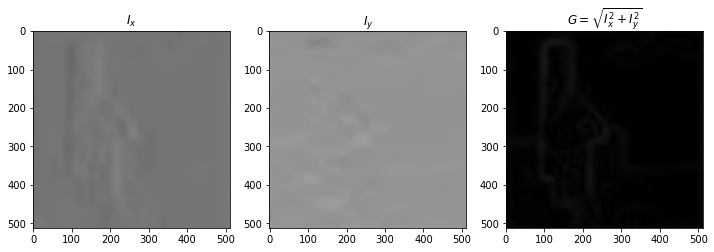

In [8]:
# Partial derivatives kernel
k = np.array([-0.5, 0, 0.5])

# Compute first derivative along x
Ix = np.zeros_like(img)
for i, r in enumerate(img_smooth):
        Ix[i, :] = signal.convolve(r, k, mode='same')

# Compute first derivative along y
Iy = np.zeros_like(img)
for i, c in enumerate(img_smooth.T):
        Iy[:, i] = signal.convolve(c, k, mode='same')

# Compute the magnitude of the gradient
G = np.sqrt(Ix**2 + Iy**2)

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(Ix, cmap=cm.gist_gray)
plt.title(r'$I_x$')
plt.subplot(132)
plt.imshow(Iy, cmap=cm.gist_gray)
plt.title(r'$I_y$')
plt.subplot(133)
plt.imshow(G, cmap=cm.gist_gray)
plt.title(r'$G = \sqrt{I_x^2+I_y^2}$')
plt.tight_layout;

### 1.3 Edge map
Thresholding the gradient you should be able to obtain the an estimate of the edges of the input image.

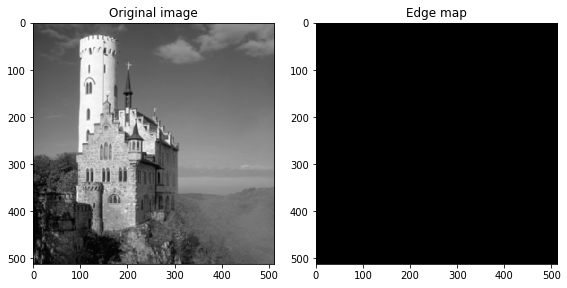

In [9]:
threshold = 0.03
edge = np.where(G > threshold, 1, 0)

plt.figure(figsize=(8,6))
plt.subplot(121)
plt.imshow(img, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(122)
plt.imshow(edge, cmap=cm.gist_gray)
plt.title('Edge map');
plt.tight_layout()

### 1.4 Edge detection function
Summarize the steps above in a single function named `edge_detector`, and test it to different images.

In [10]:
def edge_detector(img, sigma, threshold):
    """Perform edge detection on an input RGB image.
    
    - img: (n, m) input RGB image
    - sigma: float, standard deviation of the Gaussian smoothing
    - threshold: float, threshold value for the gradient
    """
    # Convert to grayscale and convert the image to float
    _img = img_as_float(color.rgb2gray(img))
    
    # Apply Gaussian filter
    img_smooth = filters.gaussian(_img, sigma)
    
    # Compute first derivatives with the following kernel
    k = np.array([-0.5, 0, 0.5])

    # Compute first derivative along x
    Ix = np.zeros(img_smooth.shape)
    for i, r in enumerate(img_smooth):
        
        Ix[i, :] = signal.convolve(r, k, mode='same')

    # Compute first derivative along y
    Iy = np.zeros(img_smooth.shape)
    for i, c in enumerate(img_smooth.T):
        Iy[:, i] = signal.convolve(c, k, mode='same')

    # Compute the mangnitude of the gradient
    G = np.sqrt(Ix**2 + Iy**2)
    
    # Generate edge map
    edge = np.where(G > threshold, 255, 0)
    
    return edge

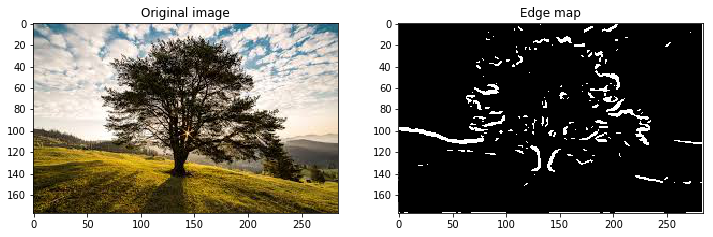

In [11]:
# Run some edge detection
RGBimg = io.imread('tree.jpeg')
edge = edge_detector(RGBimg, np.sqrt(2), 0.09)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(122)
plt.imshow(edge, cmap=cm.gist_gray)
plt.title('Edge map');

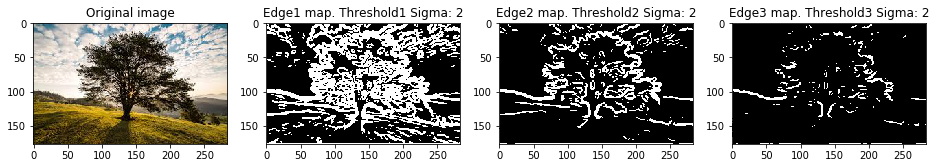

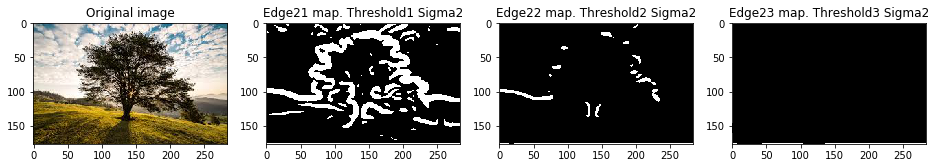

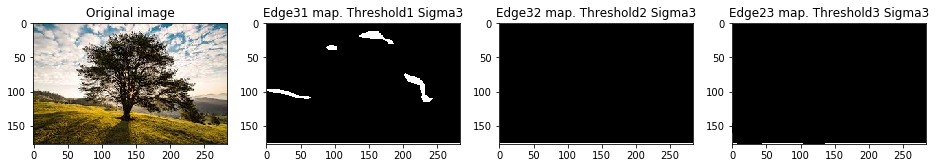

In [12]:
# FILL IN HERE: 
# by appropriate calls of the function above
# COMPARE THE EFFECT OF CHOOSING 3 DIFFERENT THRESHOLDS and 3 DIFFERENT VALUES FOR SIGMA
# Run some edge detection
sig1 = 2
sig2 = 9
sig3 = 49
thr1 = 0.03
thr2 = 0.06
thr3 = 0.09

RGBimg = io.imread('tree.jpeg')
edge1 = edge_detector(RGBimg, np.sqrt(sig1), thr1)
edge2 = edge_detector(RGBimg, np.sqrt(sig1), thr2)
edge3 = edge_detector(RGBimg, np.sqrt(sig1), thr3)

plt.figure(figsize=(16,6))
plt.subplot(141)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(142)
plt.imshow(edge1, cmap=cm.gist_gray)
plt.title('Edge1 map. Threshold1 Sigma: 2');
plt.subplot(143)
plt.imshow(edge2, cmap=cm.gist_gray)
plt.title('Edge2 map. Threshold2 Sigma: 2');
plt.subplot(144)
plt.imshow(edge3, cmap=cm.gist_gray)
plt.title('Edge3 map. Threshold3 Sigma: 2');

##Sigma2
edge21 = edge_detector(RGBimg, np.sqrt(sig2), thr1)
edge22 = edge_detector(RGBimg, np.sqrt(sig2), thr2)
edge23 = edge_detector(RGBimg, np.sqrt(sig3), thr3)

plt.figure(figsize=(16,6))
plt.subplot(141)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(142)
plt.imshow(edge21, cmap=cm.gist_gray)
plt.title('Edge21 map. Threshold1 Sigma2');
plt.subplot(143)
plt.imshow(edge22, cmap=cm.gist_gray)
plt.title('Edge22 map. Threshold2 Sigma2');
plt.subplot(144)
plt.imshow(edge23, cmap=cm.gist_gray)
plt.title('Edge23 map. Threshold3 Sigma2');

##Sigma3
edge31 = edge_detector(RGBimg, np.sqrt(sig3), thr1)
edge32 = edge_detector(RGBimg, np.sqrt(sig3), thr2)
edge33 = edge_detector(RGBimg, np.sqrt(sig3), thr3)

plt.figure(figsize=(16,6))
plt.subplot(141)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(142)
plt.imshow(edge31, cmap=cm.gist_gray)
plt.title('Edge31 map. Threshold1 Sigma3');
plt.subplot(143)
plt.imshow(edge32, cmap=cm.gist_gray)
plt.title('Edge32 map. Threshold2 Sigma3');
plt.subplot(144)
plt.imshow(edge33, cmap=cm.gist_gray)
plt.title('Edge23 map. Threshold3 Sigma3');




Comment: What does threshhold affect? What does sigma affect? 

### 1.5 Comparison with the Canny algorithm
Compare the results obtained by our simple implementation with the well known <a href="http://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=feature#skimage.feature.canny">Canny edge detector</a>.

**Hint:** check the help for `feature.canny` from the `skimage` library

In [13]:
feature.canny??

Signature:
feature.canny(
    ['image', 'sigma=1.0', 'low_threshold=None', 'high_threshold=None', 'mask=None', 'use_quantiles=False'],
)
Source:   
def canny(image, sigma=1., low_threshold=None, high_threshold=None, mask=None,
          use_quantiles=False):
    """Edge filter an image using the Canny algorithm.

    Parameters
    -----------
    image : 2D array
        Grayscale input image to detect edges on; can be of any dtype.
    sigma : float
        Standard deviation of the Gaussian filter.
    low_threshold : float
        Lower bound for hysteresis thresholding (linking edges).
        If None, low_threshold is set to 10% of dtype's max.
    high_threshold : float
        Upper bound for hysteresis thresholding (linking edges).
        If None, high_threshold is set to 20% of dtype's max.
    mask : array, dtype=bool, optional
        Mask to limit the application of Canny to a certain area.
    use_quantiles : bool, optional
        If True then treat low_threshold and hi

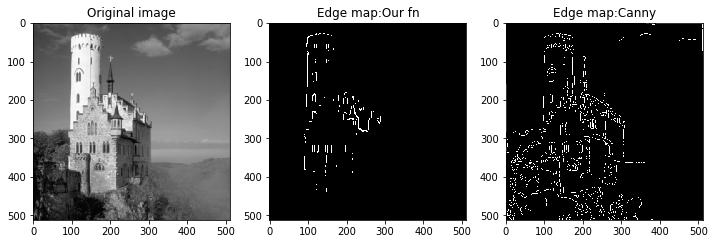

In [14]:
# Run some edge detection
RGBimg = io.imread('castle.png')
edge = edge_detector(RGBimg, np.sqrt(2), 0.09)# FILL IN HERE CALL OUR edge_detector function
edge_canny = feature.canny(RGBimg,2) # FILL IN HERE )

plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(edge, cmap=cm.gist_gray)
plt.title('Edge map:Our fn')
plt.subplot(133)
plt.imshow(edge_canny, cmap=cm.gist_gray)
plt.title('Edge map:Canny');

Why does canny edge detector differ from our own implemented function? 
[Canny Edge](https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123)

## 2. Corner detection

Corners are fundamental image features that are often used in a large number of applications such as image matching, object recognition, and so on. Among the <a href="https://en.wikipedia.org/wiki/Corner_detection">plethora of corner detection algorithms</a> a very well known is the <a href="https://en.wikipedia.org/wiki/Corner_detection#The_Harris_.26_Stephens_.2F_Plessey_.2F_Shi.E2.80.93Tomasi_corner_detection_algorithms">Shi-Tomasi</a> algorithm.

For time reasons, istead than our own implementation,  we will exploit directly <a href="http://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=feature#skimage.feature.corner_shi_tomasi">`feature.corner_shi_tomasi`</a> from `skimage` to perform some corner detection.

In [15]:
feature.corner_shi_tomasi??

Signature: feature.corner_shi_tomasi(image, sigma=1)
Source:   
def corner_shi_tomasi(image, sigma=1):
    """Compute Shi-Tomasi (Kanade-Tomasi) corner measure response image.

    This corner detector uses information from the auto-correlation matrix A::

        A = [(imx**2)   (imx*imy)] = [Axx Axy]
            [(imx*imy)   (imy**2)]   [Axy Ayy]

    Where imx and imy are first derivatives, averaged with a gaussian filter.
    The corner measure is then defined as the smaller eigenvalue of A::

        ((Axx + Ayy) - sqrt((Axx - Ayy)**2 + 4 * Axy**2)) / 2

    Parameters
    ----------
    image : ndarray
        Input image.
    sigma : float, optional
        Standard deviation used for the Gaussian kernel, which is used as
        weighting function for the auto-correlation matrix.

    Returns
    -------
    response : ndarray
        Shi-Tomasi response image.

    References
    ----------
    .. [1] http://kiwi.cs.dal.ca/~dparks/CornerDetection/harris.htm
    .. [2] http://e

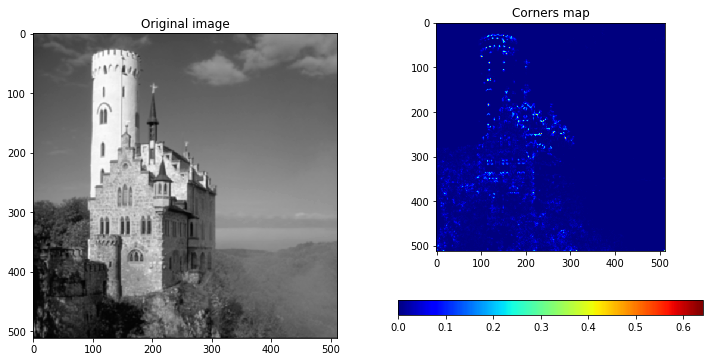

In [17]:
RGBimg = io.imread('castle.png')
corners_map = feature.corner_shi_tomasi(color.rgb2gray(RGBimg))

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.title('Original image')
plt.subplot(122)
plt.imshow(corners_map, cmap=cm.jet)
plt.colorbar(orientation='horizontal')
plt.title('Corners map');

Once the corner map is estimated, to estimate the actual corner position you should implement some corner peaks detection. A simple idea could be, for instance, to perform a simple thresholding of the corners map. Try this idea out in the next cell.

In [ ]:
# FILL IN HERE 
# threshold the corner mask 

naive_corners = ....


More refined algorithms to detect the corner peaks were proposed, see for instance `feature.corner_peaks`.

In [18]:
feature.corner_peaks??

Signature:
feature.corner_peaks(
    ['image', 'min_distance=1', 'threshold_abs=None', 'threshold_rel=0.1', 'exclude_border=True', 'indices=True', 'num_peaks=inf', 'footprint=None', 'labels=None'],
)
Source:   
def corner_peaks(image, min_distance=1, threshold_abs=None, threshold_rel=0.1,
                 exclude_border=True, indices=True, num_peaks=np.inf,
                 footprint=None, labels=None):
    """Find corners in corner measure response image.

    This differs from `skimage.feature.peak_local_max` in that it suppresses
    multiple connected peaks with the same accumulator value.

    Parameters
    ----------
    * : *
        See :py:meth:`skimage.feature.peak_local_max`.

    Examples
    --------
    >>> from skimage.feature import peak_local_max
    >>> response = np.zeros((5, 5))
    >>> response[2:4, 2:4] = 1
    >>> response
    array([[ 0.,  0.,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  0.,  0.],
           [ 0.,  0.,  1.,  1.,  0.],
           [ 0.,  0.,  1., 

Compare the results obtained by the two corner peaks approaches.

NameError: name 'naive_corners' is not defined

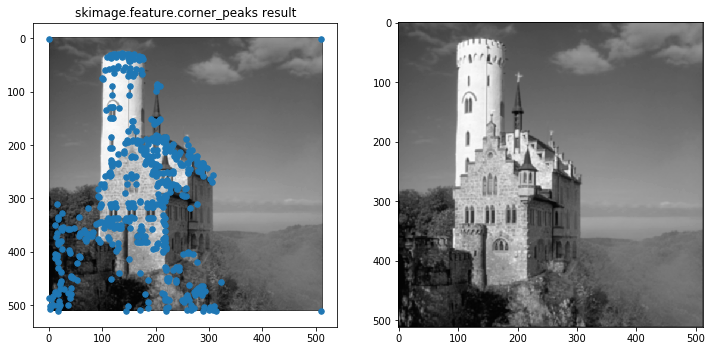

In [19]:
corners = feature.corner_peaks(feature.corner_shi_tomasi(color.rgb2gray(RGBimg)))

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.scatter(corners[:,1], corners[:,0], s=30)
plt.title('skimage.feature.corner_peaks result')

plt.subplot(122)
plt.imshow(RGBimg, cmap=cm.gist_gray)
plt.scatter(naive_corners[1], naive_corners[0], s=30, c='r')
plt.title('naive thresholding result');

## 3. Finished already?

If you still have time before the lab is over you can experiment the effect of geometric transformations (rotation and zoom, for instance) on the feature detection of above.
Check the <a href="https://scikit-image.org/docs/dev/api/skimage.transform.html"> skimage.transform library </a>